# TP2: Regression logistique

## 1. Recuperation des données
Les données sont stocker dans le fichier banking.csv. Ce dataset contient des information collecter par un centre d'appel pour savoir si un client souscrira (1/0) à un dépôt à terme (variable y) dans une baque.

1-Recuperer les données de ce fichier dans un DataFrame data

2-Afficher les 10 premiere ligne de ce dataframe

3-Afficher le nombre de client par class (1/0)


non 36548/ oui 4640


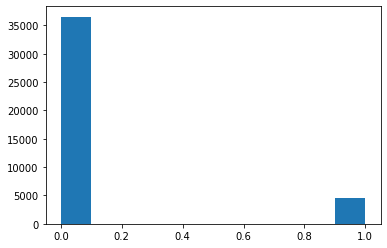

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/Client6/Desktop/IDSD2/TP02/banking.csv')
df.head(10)

print("non "+str(len(df[df['y']==0]))+"/ oui "+str(len(df[df['y']==1])))
plt.hist(df['y'])
plt.show()

In [95]:
df['y']

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

### 2- Entrainement et test du modèle
Dans un premier lieux, nous allons utiliser comme critères de classifiction suivants:
"age": l'age du client
"emp_var_rate": employment variation rate
"cons_conf_idx": consumer confidence index

1- Creer deux numpy array X et y

X: les trois colonne "age","emp_var_rate" et "cons_conf_idx"

y: "y"

2- Nous allons utiliser **80%** du dataSet pour l'entrainement et **20%** pour le teste du modèle. utiliser la méthode **train_test_split()** du module **sklearn.model_selection** pour créer ces deux sous ensembles (X_train,X_test,y_train,y_test).

3- Creer un objet **LogisticRegression** du module **sklearn.linear_model** et utiliser **(X_train,y_train)** pour entrainer le model à l'aide la méthode **fit()** du même objet.

4- Utiliser la méthode **predict(X_test)** pour predire les classe des élément de X_test : y_pred

5- Les performences du modele sont alors mesurer à l'aide 4 metriques:
**TP: Nombre de True positives y_test==y_pred==1**

**TN: Nombre de True negatives y_test==y_pred==0**

**FP: Nombre de False positives y_test!=y_pred==1**

**FN: Nombre de False negatives y_test!=y_pred==0**


**$$Accuracy = (TP+TN)/(TP+TN+FP+FN) $$**

Calculer la precision de ce modèle?

6- Ces 4 metriques forment ce qu'on appel une **Confusion Matrix** disponible comme méthode dans le module **sklearn.metrics** :  **Confusion Matrix(y_test, y_pred)**

Recalculer precision de ce modèle on utilisant cette matrice de confusion

In [134]:
from sklearn.model_selection import train_test_split
# question 1
X =df[['age','emp_var_rate','cons_conf_idx']]
Y = df['y']
# question 2
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20)
print(len(X_test))

8238


In [147]:
# auestion 3
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
modelo = logreg.fit(X_train, y_train)


In [152]:
# question 4
y_pred=modelo.predict(X_test)
sum(y_pred)

88

In [159]:
# question 5
from sklearn.metrics import accuracy_score, precision_score

print("l'accuracy est: ",accuracy_score(y_test,y_pred))
print("la precision est: ",precision_score(y_test, y_pred, average='binary'))

l'accuracy est:  0.8844379703811605
la precision est:  0.32954545454545453


In [151]:
# question 6
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[7257   59]
 [ 893   29]]


### 3- prediction
Voici des information de trois clients:

client1:  {"age": 55, "emp_var_rate": -2.9, "cons_conf_idx": 31.4}

client2:  {"age": 45, "emp_var_rate": 3.7,"cons_conf_idx": 4}

client3:  {"age": 39, "emp_var_rate": 3.3,"cons_conf_idx": 6}

1- Créer un DataFrame à partir de ce données

2- Lequel de ces client souscrira à un dépôt à terme

In [161]:
client=[
    {"age": 55, "emp_var_rate": -2.9, "cons_conf_idx": 31.4},
    {"age": 45, "emp_var_rate": 3.7,"cons_conf_idx": 4},
    {"age": 39, "emp_var_rate": 3.3,"cons_conf_idx": 6}
]
    

client = pd.DataFrame(client)
client


,age,emp_var_rate,cons_conf_idx
0,55,-2.9,31.4
1,45,3.7,4.0
2,39,3.3,6.0


In [162]:
modelo.predict(client)

array([1, 0, 0], dtype=int64)